In [1]:
# import sys
# sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import argparse
import time
import json
import csv

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs
import tqdm

import argparse
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs

from datetime import date
import os
import pandas as pd
import numpy as np

In [2]:
today = date.today().strftime("%Y_%m_%d")
print("Today's date:", today)

# create debug folder
debug_path = "run_" + today

if os.path.exists(debug_path):
    print("\'{}\' is already EXISTED! --> REMOVE OLD DIR...".format(debug_path))
    # shutil.rmtree(debug_path)
else:
    os.mkdir(debug_path)
    print("\'{}\' is CREATED!".format(debug_path))

Today's date: 2021_10_21
'run_2021_10_21' is already EXISTED! --> REMOVE OLD DIR...


In [3]:
def _extract_html(bs_data):
    # Add to check
#     with open(debug_path+'/bs.html', "w", encoding="utf-8") as file:
#         file.write(str(bs_data.prettify()))

    data = []
    table = bs_data.find('table', attrs={'class': 'table ptnk-tab-container-2'})
    table_body = table.find('tbody')

    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')

        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
        # cols = [' '.join(ele.split()) for ele in cols]
        # data.append([ele for ele in cols if ele])
    return data

In [4]:
def extract(list_student = (2004318,2033237) ):
    option = Options()
    option.add_argument("--disable-infobars")
    option.add_argument("start-maximized")
    option.add_argument("--disable-extensions")
    option.add_argument('--headless')
    option.add_argument('--no-sandbox')
    option.add_argument('--disable-dev-shm-usage')

    # Pass the argument 1 to allow and 2 to block
    option.add_experimental_option("prefs", {
        "profile.default_content_setting_values.notifications": 2,
        "profile.default_content_setting_values.images": 2,
        "profile.managed_default_content_settings.images": 2
    })

    # chromedriver should be in the same folder as file
    # browser = webdriver.Chrome(ChromeDriverManager().install())
    browser = webdriver.Chrome(executable_path="./chromedriver.exe", options=option)
    start = list_student[0]
    end = list_student[1]
    sbd = start
    while sbd <= end:
        SBD = str(sbd).zfill(8)
        SBD = SBD[:6] + '**'
        browser.get("https://thanhnien.vn/giao-duc/tuyen-sinh/2021/tra-cuu-diem-thi-thpt-quoc-gia.html#{}".format(SBD))
        source_data = browser.page_source
        bs_data = bs(source_data, 'html.parser')
        s = _extract_html(bs_data)
        data = pd.DataFrame(s)
        data.to_csv(debug_path+f'/{sbd}.csv', index=False)
        sbd += 100
    return data

In [5]:
import math
def seperate_thread(list_student = (2000000,2089180), thread = 4):
    start = list_student[0]
    end = list_student[1] + 1
    divi = math.floor((end - start) / thread)
    list_students = []
    for i in range(thread-1):
        list_students.append((start + i*divi, start + (i+1)*divi ))
    list_students.append((start + (thread-1)*divi, end))
    return list_students

In [6]:
import concurrent

In [7]:
list_students = seperate_thread(list_student = (2000000,2089180), thread = 5)
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(extract, list_students)

In [8]:
import os

In [9]:
df = pd.DataFrame()
for f in os.listdir(f'./{debug_path}')[1:]:
    read = pd.read_csv(debug_path+f'/{f}')
    df = pd.concat([df, read])

In [10]:
df = df.iloc[:, 2:-1]

In [11]:
columns = ['Họ và Tên', 'SBD', 'Ngày sinh', 'Giới tính', 
           'Toán', 'Ngữ văn', 'Vật lí', 'Hóa học', 'Sinh học', 
           'KHTN', 'Lịch sử', 'Địa lý', 'GDCD', 'KHXH', 'Ngoại ngữ']

In [12]:
df.columns = columns

In [13]:
df

,Họ và Tên,SBD,Ngày sinh,Giới tính,Toán,Ngữ văn,Vật lí,Hóa học,Sinh học,KHTN,Lịch sử,Địa lý,GDCD,KHXH,Ngoại ngữ
0,Bùi Thọ Thái Dương,2000096,28-07-2003,Nam,7.8,5.75,7.75,6.75,5.50,6.67,NaN,NaN,NaN,NaN,NaN
1,Trần Mai Duyên,2000095,21-09-2003,Nữ,8.0,NaN,NaN,NaN,NaN,6.67,NaN,NaN,NaN,NaN,NaN
2,Nguyễn Thanh Hồng Duyên,2000094,16-07-2003,Nữ,8.0,6.75,5.50,6.25,7.25,6.33,NaN,NaN,NaN,NaN,8.8
3,Nguyễn Ngọc Bảo Duyên,2000092,07-09-2003,Nữ,8.8,6.75,8.75,7.75,3.25,6.58,NaN,NaN,NaN,NaN,9.0
4,Trần Tín Duy,2000091,19-11-2003,Nam,8.0,5.75,8.75,8.25,5.50,7.50,NaN,NaN,NaN,NaN,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nguyễn Ngọc Hân,2071485,05-03-2003,Nữ,7.2,3.50,5.25,6.50,5.25,5.67,NaN,NaN,NaN,NaN,5.4
96,Hồ Gia Hân,2071481,22-11-2003,Nữ,5.6,6.50,NaN,NaN,NaN,NaN,3.75,6.75,8.0,6.17,7.4
97,Nguyễn Phương Hằng,2071471,01-11-2003,Nữ,5.2,6.75,NaN,NaN,NaN,NaN,4.50,5.50,9.0,6.33,5.2
98,Ngô Thanh Hà,2071429,11-05-2003,Nữ,7.4,6.50,6.50,6.75,4.75,6.00,NaN,NaN,NaN,NaN,9.2


In [14]:
df.to_csv('./89k.csv', index = False)

In [ ]:
import pandas as pd
df = pd.read_csv('./89k.csv')

In [16]:
df.describe()

,SBD,Toán,Ngữ văn,Vật lí,Hóa học,Sinh học,KHTN,Lịch sử,Địa lý,GDCD,KHXH,Ngoại ngữ
count,8.788900e+04,86636.000000,86457.000000,51731.000000,51910.000000,51552.000000,51552.000000,35621.000000,35442.000000,34189.000000,34189.000000,83951.000000
mean,2.035948e+06,7.274793,6.477391,6.325260,6.632759,5.628472,6.196979,5.399497,7.094697,8.636126,7.025445,7.169296
std,2.516620e+04,1.167164,0.999762,1.378356,1.430758,1.380208,1.053516,1.636971,0.994727,0.963240,0.963568,2.002035
min,2.000001e+06,2.800000,2.000000,2.750000,1.750000,0.250000,3.250000,1.500000,4.000000,5.000000,4.580000,1.800000
25%,2.017827e+06,6.600000,6.000000,5.500000,5.500000,4.750000,5.500000,4.000000,6.500000,8.250000,6.250000,5.600000
50%,2.035750e+06,7.400000,6.500000,6.500000,7.000000,5.500000,6.250000,5.500000,7.000000,8.750000,7.080000,7.600000
75%,2.053575e+06,8.200000,7.250000,7.500000,7.750000,6.500000,6.940000,6.750000,7.750000,9.500000,7.830000,8.800000
max,2.071499e+06,9.800000,8.500000,9.000000,9.250000,10.000000,8.420000,9.000000,9.250000,10.000000,8.920000,10.000000


In [32]:
for c in df.columns[4:]:
    print('Tỷ lệ thi môn ', c, ': ', len(df[df[c].notnull()])/len(df))

Tỷ lệ thi môn  Toán :  0.9857433808553971
Tỷ lệ thi môn  Ngữ văn :  0.9837067209775967
Tỷ lệ thi môn  Vật lí :  0.5885947046843177
Tỷ lệ thi môn  Hóa học :  0.5906313645621182
Tỷ lệ thi môn  Sinh học :  0.5865580448065173
Tỷ lệ thi môn  KHTN :  0.5865580448065173
Tỷ lệ thi môn  Lịch sử :  0.40529531568228105
Tỷ lệ thi môn  Địa lý :  0.40325865580448067
Tỷ lệ thi môn  GDCD :  0.3890020366598778
Tỷ lệ thi môn  KHXH :  0.3890020366598778
Tỷ lệ thi môn  Ngoại ngữ :  0.955193482688391


In [34]:
df

,Họ và Tên,SBD,Ngày sinh,Giới tính,Toán,Ngữ văn,Vật lí,Hóa học,Sinh học,KHTN,Lịch sử,Địa lý,GDCD,KHXH,Ngoại ngữ
0,Bùi Thọ Thái Dương,2000096,28-07-2003,Nam,7.8,5.75,7.75,6.75,5.50,6.67,NaN,NaN,NaN,NaN,NaN
1,Trần Mai Duyên,2000095,21-09-2003,Nữ,8.0,NaN,NaN,NaN,NaN,6.67,NaN,NaN,NaN,NaN,NaN
2,Nguyễn Thanh Hồng Duyên,2000094,16-07-2003,Nữ,8.0,6.75,5.50,6.25,7.25,6.33,NaN,NaN,NaN,NaN,8.8
3,Nguyễn Ngọc Bảo Duyên,2000092,07-09-2003,Nữ,8.8,6.75,8.75,7.75,3.25,6.58,NaN,NaN,NaN,NaN,9.0
4,Trần Tín Duy,2000091,19-11-2003,Nam,8.0,5.75,8.75,8.25,5.50,7.50,NaN,NaN,NaN,NaN,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nguyễn Ngọc Hân,2071485,05-03-2003,Nữ,7.2,3.50,5.25,6.50,5.25,5.67,NaN,NaN,NaN,NaN,5.4
96,Hồ Gia Hân,2071481,22-11-2003,Nữ,5.6,6.50,NaN,NaN,NaN,NaN,3.75,6.75,8.0,6.17,7.4
97,Nguyễn Phương Hằng,2071471,01-11-2003,Nữ,5.2,6.75,NaN,NaN,NaN,NaN,4.50,5.50,9.0,6.33,5.2
98,Ngô Thanh Hà,2071429,11-05-2003,Nữ,7.4,6.50,6.50,6.75,4.75,6.00,NaN,NaN,NaN,NaN,9.2


In [64]:
df['Họ'] = df['Họ và Tên'].str.split(' ').str[0]
df['Tên'] = df['Họ và Tên'].str.split(' ').str[-1]

<AxesSubplot:xlabel='Họ'>

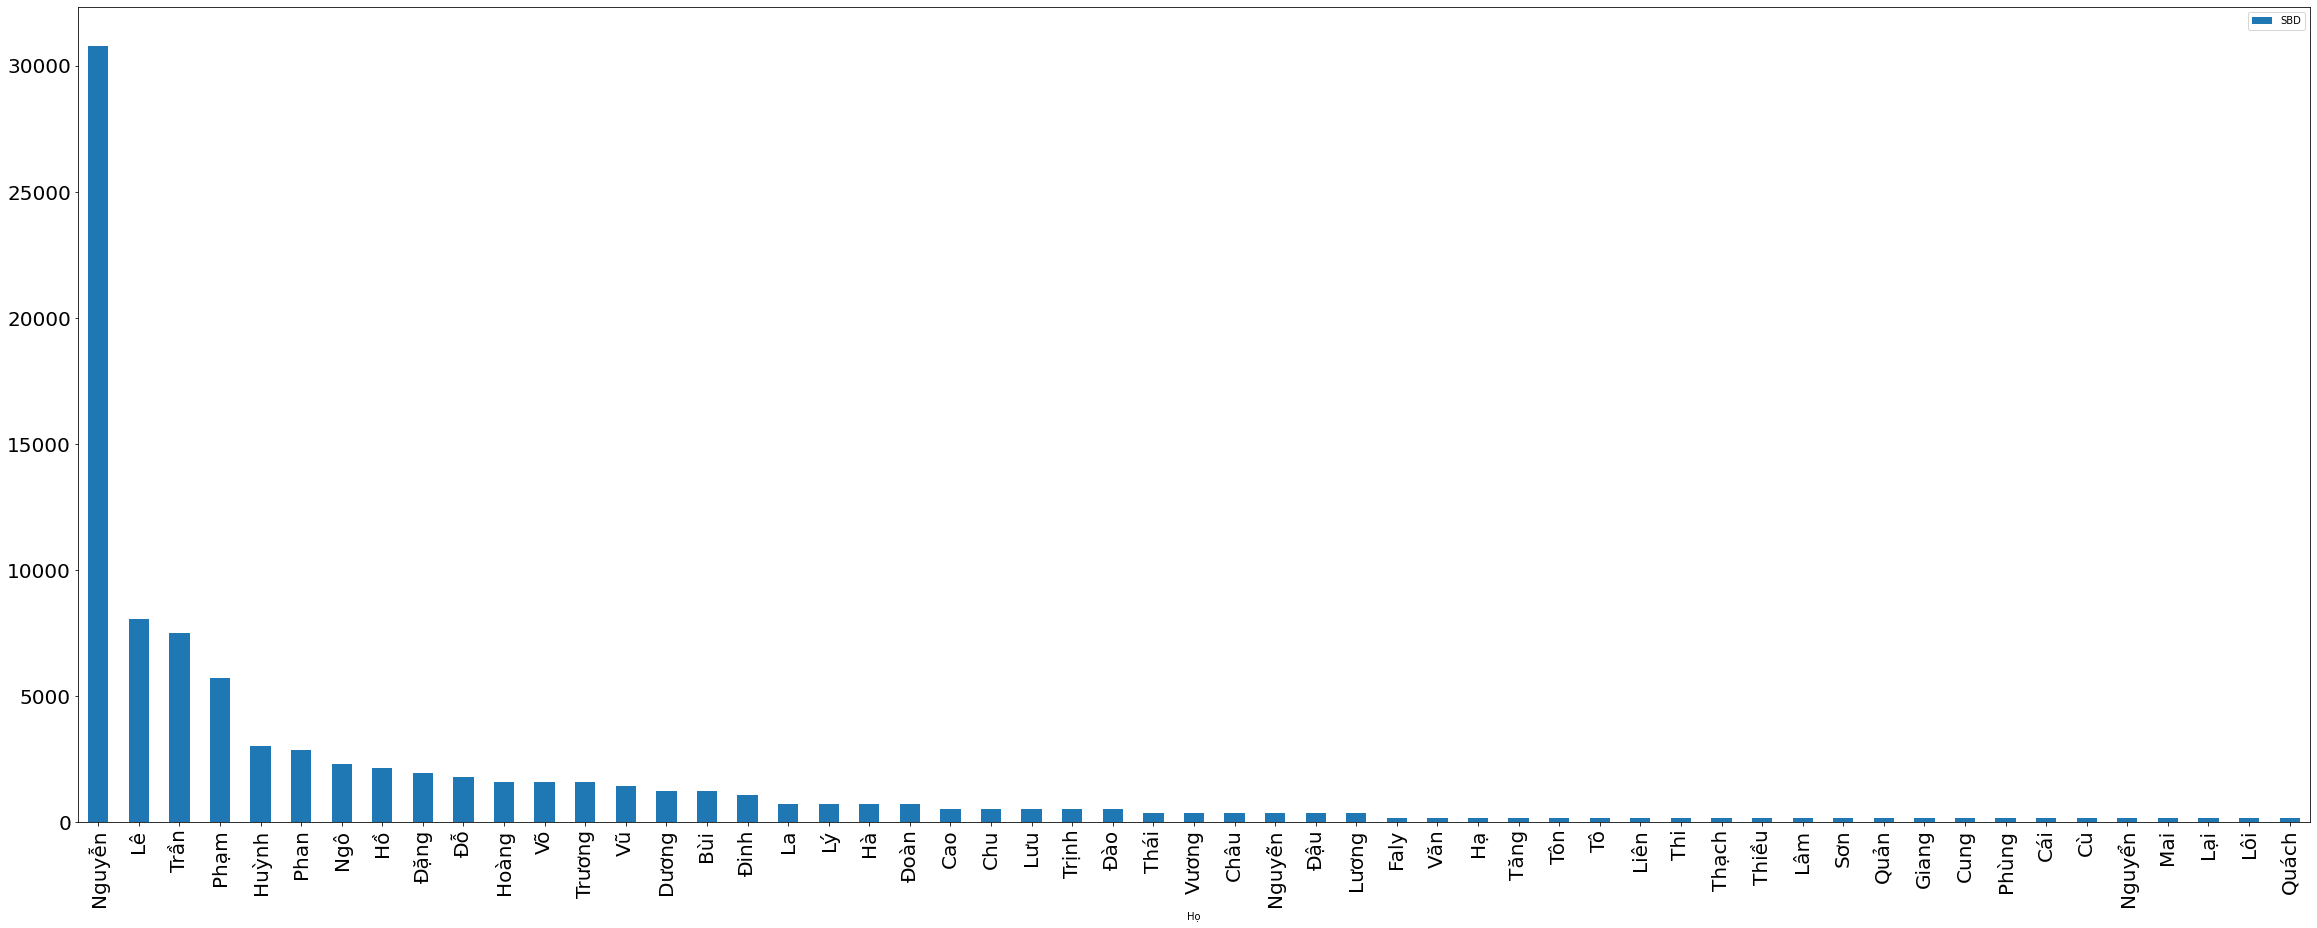

In [56]:
df.groupby('Họ')['SBD'].count().reset_index().sort_values('SBD',ascending=False).plot.bar(x='Họ', y='SBD', figsize = (40,15), fontsize = 20)


<AxesSubplot:xlabel='Tên'>

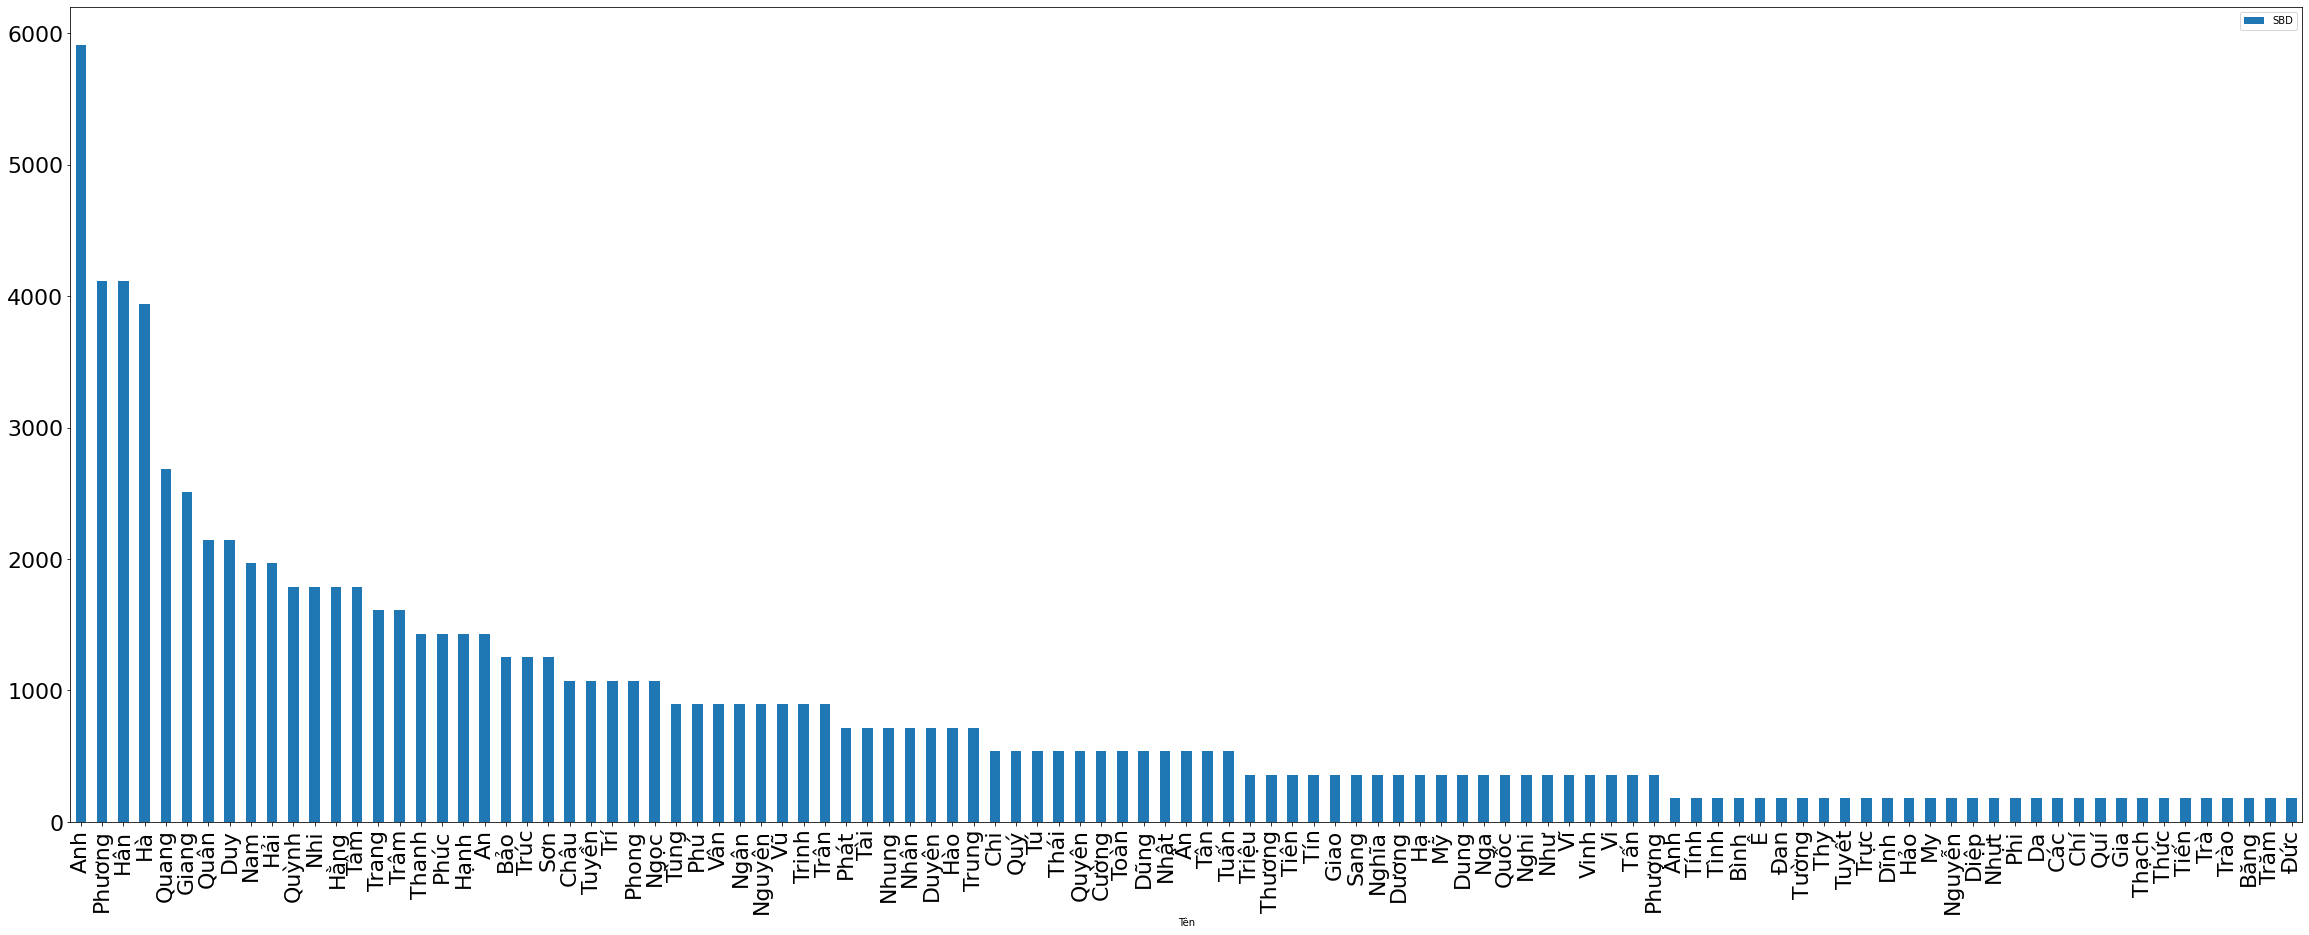

In [75]:
df.groupby('Tên')['SBD'].count().reset_index().sort_values('SBD',ascending=False).plot.bar(x='Tên', y='SBD', figsize = (40,15), fontsize = 22)


Toán
Ngữ văn
Vật lí
Hóa học
Sinh học
KHTN
Lịch sử
Địa lý
GDCD
KHXH
Ngoại ngữ


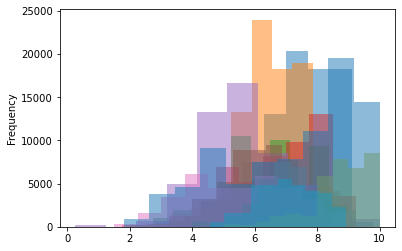

In [62]:
for c in df.columns[4:-1]:
    print(c)
    df[c].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

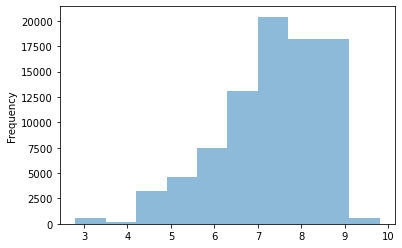

In [63]:
df['Toán'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

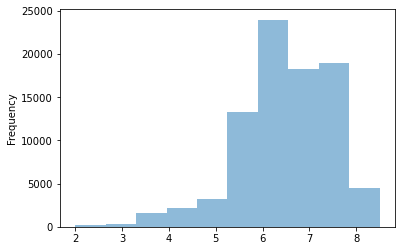

In [68]:
df['Ngữ văn'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

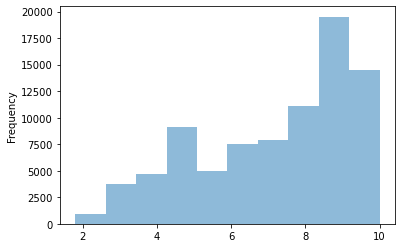

In [71]:
df['Ngoại ngữ'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

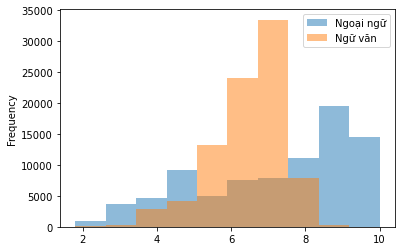

In [73]:
df[['Ngoại ngữ', 'Ngữ văn']].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

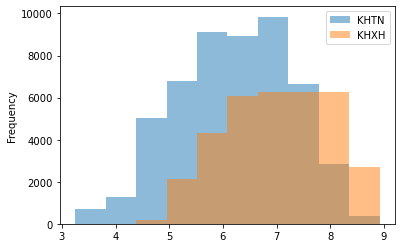

In [90]:
df[['KHTN', 'KHXH']].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='SBD'>

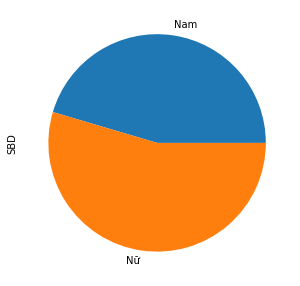

In [88]:
df.groupby('Giới tính')['SBD'].count().plot.pie(y='SBD', x='Giới tính', figsize=(5, 5))

In [89]:
df.groupby('Giới tính')['SBD'].count()

Giới tính
Nam    39917
Nữ     47972
Name: SBD, dtype: int64